## Shortest path planning

example from motion planning course offered by Univ of Toronto

A map of Berkley, California is given
* Implement Dijkstra's search algorithm on a road network graph.
* Implement the A* search algorithm using a Euclidean heuristic on a road network graph. 

[OSMNX library](https://osmnx.readthedocs.io/en/stable/) is used to generate Python graphs from Open Street Map (OSM) data.  

In [1]:
!pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pykitti

In [3]:
#from https://github.com/sidmitra/osmnx_playground

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

In [100]:
test = [['start' , (49.009347760599, 8.4371344308375)]]

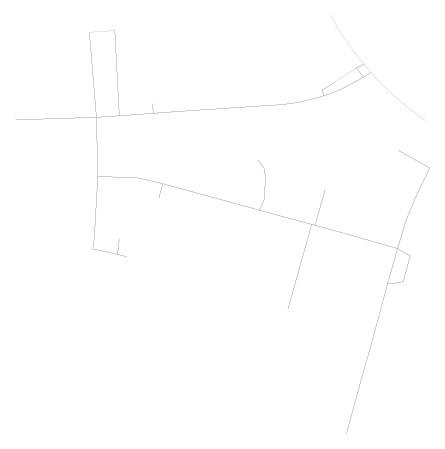

In [120]:
name, point = test[0]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=195,dist_type="bbox", network_type=nt, truncate_by_edge=True)
fig ,ax = ox.plot_graph(G, node_size=0.1, edge_linewidth=0.1, edge_color='#000000', bgcolor='#ffffff', save=True, filepath='test1.png', show=True)

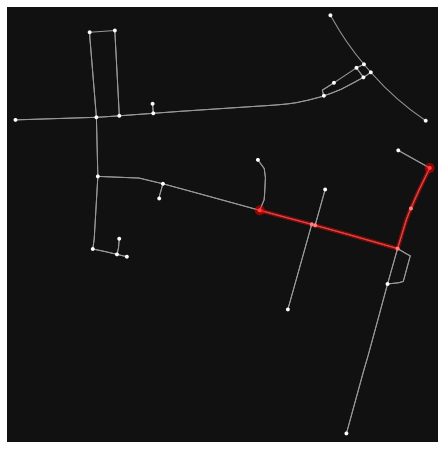

In [116]:
origin_point = (49.009347760599, 8.4371344308375)
destination_point = (49.010013293278, 8.4404680725925)
origin_node = ox.distance.nearest_nodes(G, origin_point[1], origin_point[0])
destination_node = ox.distance.nearest_nodes(G, destination_point[1], destination_point[0])
shortest_path = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, shortest_path)

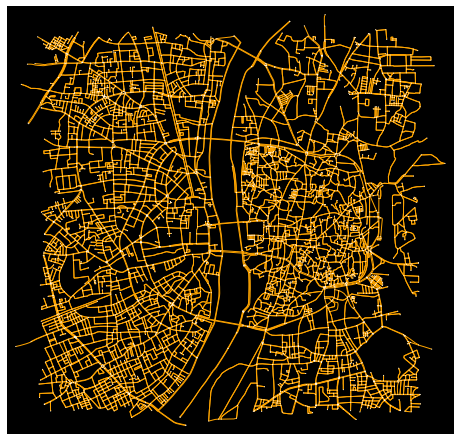

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
name, point = places[6]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

Print the edges and nodes of this graph

In [ ]:
print(len(G.nodes()), len(G.edges()))

5308 13020


Arbitrarily select the first node and last node in the Graph and find the shortest path

In [ ]:
list(G.nodes())[0]

245711252

In [ ]:
origin = list(G.nodes())[0]
destination = list(G.nodes())[1000]
shortest_path = nx.shortest_path(G, origin, destination)

Now visualize using plot_graph_route

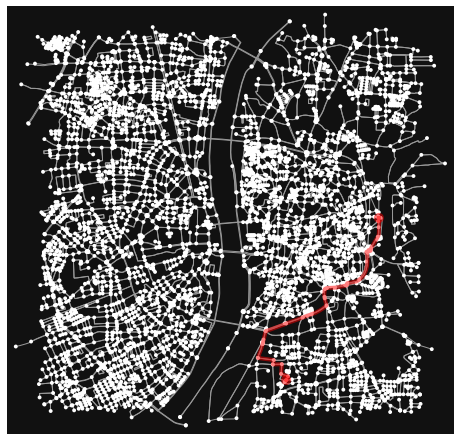

In [ ]:
fig, ax = ox.plot_graph_route(G, shortest_path)

In [ ]:
# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(oshawa, dist=2000)
start = ox.geocode('2000 Simcoe St N, Oshawa, Ontario')
end = ox.geocode('18 Niagara Dr, Oshawa, Ontario')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
278589216,43.928847,-78.874744,3,NaN,POINT (-78.87474 43.92885)
278589217,43.928758,-78.874863,3,NaN,POINT (-78.87486 43.92876)
278589220,43.928360,-78.877049,3,NaN,POINT (-78.87705 43.92836)
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)


In [ ]:
# tree = KDTree(, metric=)

#start_idx = tree.query()[0]
#end_idx = tree.query()[0]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]

#retrieve origin and destination node id
#origin = 
#destination = 

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)


NodeView((278589216, 278589217, 278589220, 278589616, 278589617, 278589715, 278589716, 278589725, 278589727, 287484079, 287484083, 309716425, 309716429, 309716456, 309716460, 309716462, 309716470, 309716482, 309716487, 316500997, 321874320, 321911734, 321911772, 321911775, 321911977, 321911990, 321912002, 321912009, 321912010, 321912076, 321920921, 321920936, 321920939, 321927934, 321928007, 321928012, 321928022, 321928043, 321928362, 321928363, 321928472, 321928540, 321928556, 321929341, 321929350, 321929380, 321929390, 321929673, 321929675, 321929676, 321930037, 321930039, 321930047, 321930049, 321930055, 321930056, 321930503, 322085656, 327279427, 327279429, 327279549, 327279580, 327279585, 327279740, 327280575, 327281016, 327281680, 327281684, 329880950, 329882421, 329882440, 329882458, 329886144, 329886152, 329886382, 329886383, 329886574, 329886575, 329887050, 329887068, 329887409, 329887656, 329887659, 329888258, 329888276, 329888485, 329888486, 329890642, 329890933, 329895301, 

Visualize the shortest path and graph

In [ ]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(uoit[1], uoit[0], c='red', s=100)
ax.scatter(address[1], address[0], c='blue', s=100)
ax.scatter(closest_node_address['y'], closest_node_address['x'], c='green', s=100)
ax.scatter(closest_node_uoit['y'], closest_node_uoit['x'], c='green', s=100)

Use these ideas to find shortest path between 2 addresses/ geocodes in an Indian city of your choice 